<a href="https://colab.research.google.com/github/YGuo00/MA-573-Independent-Study/blob/main/src/day4_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
class VanillaOption:
    def __init__(   # initialize method
        self,
        otype = 1,   # call = 1; put = -1
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price

    def payoff(self, s):   # s: exercise price
        otype = self.otype
        k = self.strike
        maturitiy = self.maturity
        return max([0, (s - k) * otype])

In [3]:
class Gbm:
    def __init__(
        self,
        init_state = 100.,   
        drift_ratio = .0475,   
        vol_ratio = .2):   
      self.init_state = init_state
      self.drift_ratio = drift_ratio
      self.vol_ratio = vol_ratio

In [4]:
def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio

    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity

    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)

    return (otype * s0 * ss.norm.cdf(otype * d1) - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2)) 

Gbm.bsm_price = bsm_price

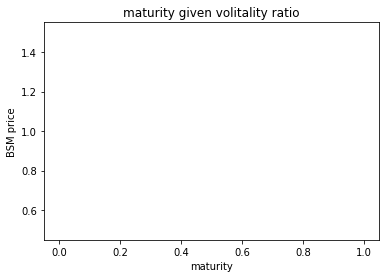

In [7]:
gbm1 = Gbm(
    init_state = 100.,
    drift_ratio = .0475,
    vol_ratio = 0.2)

option1 = VanillaOption(
    otype = 1.,
    strike = 110)

T = np.arange(0.5, 2)
Y = str(gbm1.bsm_price(option1))
plt.plot(T, Y)

plt.xlabel('maturity')
plt.ylabel('BSM price')
plt.title('maturity given volitality ratio')
plt.show()

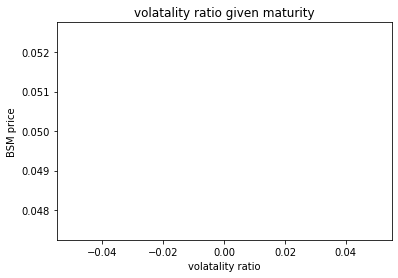

In [8]:
gbm1 = Gbm(
    init_state = 100.,
    drift_ratio = .0475)

option1 = VanillaOption(
    otype = 1.,
    strike = 110,
    maturity = 1)

sigma = np.arange(0.05, 0.5)
Y = str(gbm1.bsm_price(option1))
plt.plot(sigma, Y)

plt.xlabel('volatality ratio')
plt.ylabel('BSM price')
plt.title('volatality ratio given maturity')
plt.show()